In [1]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

# 1. Dataset

In [6]:
x, y = make_regression(n_samples = 100, n_features = 1, noise = 10)
y = y + abs(y/2)

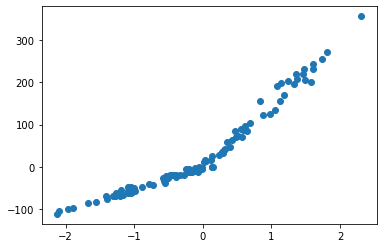

In [7]:
plt.scatter(x, y)

In [8]:
print(x.shape)
'''
on doit redimensionner le vecteur y car quand on utilise la 
fonction make_regression les dimensions de y ne sont pas 
complètes.
'''
y = y.reshape(100,1)
print(y.shape)

(100, 1)
(100, 1)


In [9]:
#la matrice X qui contient la colonne de biais ( la colonne 1,1,1...)
X = np.hstack((x, np.ones(x.shape)))# cette fonction permet de coller deux matrices numpy de mm nombre de lignes
X = np.hstack((x**2, X))
X


array([[ 2.26889608e-01,  4.76329306e-01,  1.00000000e+00],
       [ 2.19758824e-01,  4.68784411e-01,  1.00000000e+00],
       [ 4.53220698e+00, -2.12889807e+00,  1.00000000e+00],
       [ 2.75471235e-02, -1.65973261e-01,  1.00000000e+00],
       [ 2.59000142e+00,  1.60934813e+00,  1.00000000e+00],
       [ 1.40821991e+00,  1.18668442e+00,  1.00000000e+00],
       [ 2.01274133e+00, -1.41871115e+00,  1.00000000e+00],
       [ 7.61690730e-01,  8.72748950e-01,  1.00000000e+00],
       [ 3.76031142e-02, -1.93915224e-01,  1.00000000e+00],
       [ 3.85324833e+00, -1.96296926e+00,  1.00000000e+00],
       [ 2.78424684e+00, -1.66860626e+00,  1.00000000e+00],
       [ 7.98938131e-01, -8.93833391e-01,  1.00000000e+00],
       [ 1.60850417e+00, -1.26826818e+00,  1.00000000e+00],
       [ 2.09114682e-01, -4.57290588e-01,  1.00000000e+00],
       [ 1.57916800e-01, -3.97387469e-01,  1.00000000e+00],
       [ 1.71959934e+00, -1.31133495e+00,  1.00000000e+00],
       [ 2.22546449e-02,  1.49179908e-01

In [10]:
X.shape

(100, 3)

In [11]:
#le vecteur theta
theta = np.random.randn(3,1)
theta.shape

(3, 1)

In [14]:
theta

array([[-2.02740169],
       [-0.66236305],
       [ 1.03734439]])

# 2.Le modèle

In [23]:
def model(X, theta):
    return X.dot(theta)

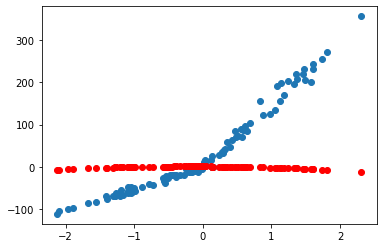

In [43]:
plt.scatter(x, y)
plt.scatter(x, model(X, theta), c = 'r')

In [25]:
# l'erreur quadratique moyenne
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta)- y)**2)

In [26]:
cost_function(X, y, theta)

5979.106271189504

# 4.Descente de gradient

In [27]:
def grad(X, y, theta):
    m = len(y)
    return 1/(2*m) * X.T.dot(model(X, theta) - y)

In [28]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations)
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta)
        cost_history[i] = cost_function(X, y, theta)
    return theta, cost_history
        

# 5.Entrainement du modèle

In [36]:
theta_final, cost_history = gradient_descent(X, y, theta, learning_rate = 0.01, n_iterations = 1000 )
theta_final

array([[24.05410948],
       [99.4656444 ],
       [14.70548033]])

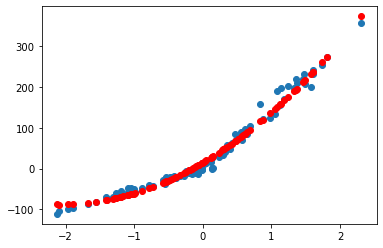

In [45]:
prediction = model(X, theta_final)
plt.scatter(x[:,0], y)
plt.scatter(x[:,0], prediction, c='r')

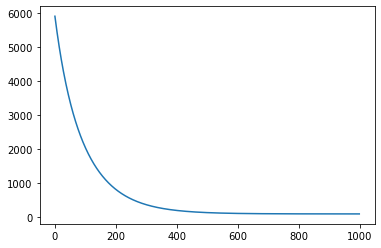

In [46]:
plt.plot(range(1000), cost_history)

In [47]:
def coef_determination(y, pred):
    u = ((y- pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [48]:
coef_determination(y, prediction)

0.9832006564566671